## 0.Machine Learning 과정

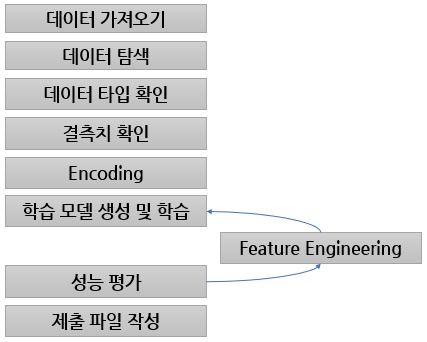

## 1.Machine Learning - 전처리

### 1-1.문제지와 실제 dtype차이 확인
**문제지 요구사항에 제시된 column의 dtype이 file에서 읽어온 데이터와 동일한지 확인하여 문제지에 제시된 것에 맞도록 변환**
 - 숫자가 아닌 문자가 포함되어 있는 경우 object로 표기되며 이때는 해당 문자를 찾아 없애야 함
    - 일단 astype('int'), astype('float') 등을 사용하여 변환해 보고,   무엇 때문에 변환이 안되는지 오류 메시지를 확인함
    - 오류메시지에 따라 불필요한 문자를 제거함 (Series.replace(regex=True) 또는 Series.str.replace() 사용)
    - astype()을 사용하여 숫자형 데이터로 변경함

- 날짜/시간 데이터의 경우 pd.to_datetime(Series, format='%Y%m%d') 를 사용하면 문제없이 변환 가능
    - 일반적인 날짜/시간 형식은 astype('datetime64')로 변경 가능




In [ ]:
import pandas as pd

data = {'point': ['1', '*2', '3', '*4', '1'],
        'date': ['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06'],
        'gender': ['F', 'M', 'M', 'F', 'M']}
df = pd.DataFrame(data)
df.info()

### 1-2.모든 column의 dtype 확인
**Machine Learning을 위한 column의 dtype은 int 또는 float 이어야 한다**
- 범주형 데이터는 LabelEncoding 또는 OneHotEncoding을 사용하여 수치형으로 변경
- 날짜/시간 데이터는 dt를 사용하여 year, month, day, hour, weekdays, quarter .. 등 정보를 분할하여 Feature로 사용함
   - 분할 정보의 nunique() 가 1이거나 var() 가 0 값인 것은 의미 없으므로 Feature로 사용하지 않음

### 1-3.train, test 데이터
**train, test 데이터는 세 개의 파일로 나뉘어 제공됨**
- train 데이터 : 학습용 데이터, X_train.csv, Y_train.csv
    - 학습 모델을 만들 때 사용
    - 성능 예측을 위해 2개 나누어 사용 또는 GridSearchCV 사용
- test 데이터 : 평가용 데이터, X_test.csv
    - 제출 용도의 파일 작성에 사용
    - train 데이터로 생성된 학습 모델을 사용하여 평가용 파일 작성
- train, test 데이터의 X(입력) Feature
    - 동일한 가공 처리가 되어야 함
    - Feature 순서, 개수가 동일해야 함
    - 2차원의 형태이어야 함
- train 데이터의 Y(출력, target)은 한 개의 column으로 1차원 형태이어야 함
- train, test 데이터가 서로 섞여서는 안됨
- test 데이터는 그 행의 순서나 개수가 변경되어서는 안됨 (shuffle, drop 금지)


### 1-4.결측치(NA Value)
- Machine Learning에 사용되는 데이터는 결측치를 가지고 있으면 안됨
- train, test 데이터를 보고 양쪽에 결측치가 있는 경우 채우기를 실행하고,
- train 데이터만 결측치가 있는 경우 삭제/채우기 등 원하는 처리를 할 수 있음

### 1-5.평가 결과 제출
- 원하는 의도를 잘 파악하여 파일에 쓰기 하여 제출해야 함
- 다양한 평가 도구를 사용할 수 있어야 하며, 결과를 파일에 저장할 수 있어야 함


### 1-6.도움말 사용법
- sklearn에서 사용할 도구의 import 방법을 암기
- dir(), help() 등의 기능을 잘 사용하도록 함


## 2.Mini Project - 자녀의 키 예측
- 부모의 키를 사용하여 자녀의 키를 예측하는 회귀 모델 작성

### 2-1.아들키 예측

In [ ]:
import pandas as pd

data_train = {'아빠' : [175, 180, 172, 174, 178, 168, 173, 177],
        '엄마' : [160, 158, 155, 161, 163, 160, 168, 167],
        '아들' : [178, 182, 175, 180, 183, 174, 179, 183],
        '딸' : [163, 168, 157, 164, 167, 158, 169, 169]}
df = pd.DataFrame(data_train)
df.index.name = 'id'
df[['아빠', '엄마']].to_csv('X_train.csv')
df[['아들']].to_csv('Y1_train.csv')
df[['딸']].to_csv('Y2_train.csv')

data_test = {'아빠' : [174, 179, 180],
             '엄마' : [160, 160, 160]}
df2 = pd.DataFrame(data_test)
df2.index.name = 'id'   
df2.to_csv('X_test.csv')     

In [ ]:
# [0] train, test 파일 가져오기


- DataFrame.corr() : 각 Feature 간 상관관계를 확인할 수 있는 DataFrame을 생성함
- -1 ~ 1의 사이 값을 갖으며, 0인 경우 상관관계가 없는 것임

In [ ]:
# [1] 아빠, 엄마, 아들 키의 상관관계


- X : 아빠, 엄마의 키
- Y1 : 아들의 키
- Y2 : 딸의 키

In [ ]:
# [2] 데이터 지정하기
# 아빠, 엄마의 키를 사용해 아들의 키를 예측 (X=[아빠, 엄마], Y1=[아들])


In [ ]:
# [3] 아들 키를 예측하는 모델 만들어 분석하기
from sklearn.linear_model import LinearRegression


In [ ]:
# [4] 아들 모델 성능 평가하기


In [ ]:
# [5] 결과를 표로 작성하기 (예측, 오차)
result = df[['아빠', '엄마','아들']]
result['아들예측'] = __________________
result['아들오차'] = result['아들'] - result['아들예측']
result

In [ ]:
# [6] 새로운 데이터로 예측하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
아들키 = _________________
print(f'아들의 예상키는 {아들키[0]}입니다')

In [ ]:
# [7] 새로운 데이터로 확인하기 - X_test.csv 로 확인하기


### 2-2.직접 작업해 보세요
- 아들키 예측 프로그램을 보고 딸키 예측 프로그램 만들기

In [ ]:
# [0] train, test 파일 가져오기 - 'X_train.csv', 'Y2_train.csv', 'X_test.csv' 사용
X_train = 
Y2_train =
X_test = 

In [ ]:
# [1] 아빠, 엄마, 아들 키의 상관관계 확인
df = 
df['딸'] = 


In [ ]:
# [2] 데이터 지정하기
# 아빠, 엄마의 키를 사용해 딸의 키를 예측 (X=[아빠, 엄마], Y2=[딸])
X =
Y2 = 

In [ ]:
# [3] 딸 키를 예측하는 모델 만들기 (LinearRegression 사용)
# 모델이름을 model_d 로 사용해 주세요.


In [ ]:
# [4] 딸모델 성능 평가하기


In [ ]:
# [5] 딸모델의 예측 값, 오차 확인
result = df[['아빠', '엄마', '딸']
result['딸예측'] = 
result['딸오차'] = 
result

In [ ]:
# [6] 새로운 데이터로 확인하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
딸키 = __________
print(f'딸의 예상키는 {딸키[0]}입니다')

In [ ]:
# [7] 새로운 데이터로 확인하기 - X_test.csv 로 확인하기


### 2-3.상관계수, 절편확인, 객체를 파일로 저장

In [ ]:
# [1] 상관계수 확인하기


In [ ]:
# [2] 모델 저장하기
import shelve

with shelve.open('height') as data:
    data['model_son'] = model
    data['model_daughter'] = model_d
print('저장완료') 

저장완료


In [ ]:
# [3] 모델 불러오기
import shelve

with shelve.open('height') as data:
    A = data['model_son']
    B = data['model_daughter']
print('불러오기 완료') 

불러오기 완료


In [ ]:
# [4] 새로운 데이터로 확인하기
아빠키 = int(input('아빠키를 입력해 주세요 : '))
엄마키 = int(input('엄마키를 입력해 주세요 : '))
data = [[아빠키, 엄마키]]
아들키 = model.predict(data)
print(f'딸의 예상키는 {아들키[0]}입니다')

^^!  데이터가 부실하며(?!) 이상치(Outlier)도 없기 때문에 결과를 믿으시면 아니됩니다!